In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl


df=pd.read_excel('result_mod_28June2024.xlsx')


In [7]:
df.info()
#df.columns()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37771 entries, 0 to 37770
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 37771 non-null  int64         
 1   status                     37771 non-null  object        
 2   title                      37771 non-null  object        
 3   ap_num                     37771 non-null  int64         
 4   application_date           37771 non-null  datetime64[ns]
 5   applicant                  37771 non-null  object        
 6   representative             36375 non-null  object        
 7   final_owner                18702 non-null  object        
 8   priority_date              8288 non-null   float64       
 9   international_filing_date  3688 non-null   float64       
 10  summary                    37770 non-null  object        
 11  제너럴                        37771 non-null  int64         
 12  의료  

In [ ]:
data = df.copy()

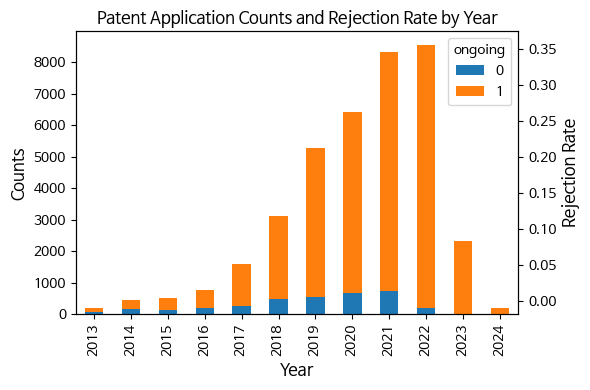

In [58]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import os

current_directory=os.getcwd()
# 나눔바른고딕 글꼴 파일 경로 지정
font_path = os.path.join(current_directory, 'NanumBarunGothic.ttf')

# 글꼴이 있는지 확인
if os.path.exists(font_path):
    # 폰트 추가
    fm.fontManager.addfont(font_path)

    # 캐시를 새로 고치지 않고 직접 폰트 설정
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc("font", family=font_prop.get_name())
    plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정


# 출원 건수 계산
counts = data.groupby(['application_year', 'ongoing']).size().unstack(fill_value=0)
rejection_rate = counts[0] / counts.sum(axis=1)

# 시각화
fig, ax1 = plt.subplots(figsize=(6, 4))

# 막대 그래프 (출원 건수)
counts.plot(kind='bar', stacked=True, ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=rejection_rate, linestyle='--', marker='o', color='purple', ax=ax2)

# 그래프 제목과 축 레이블 설정
ax1.set_title('Patent Application Counts and Rejection Rate by Year', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Counts', fontsize=12, fontweight='bold')
ax2.set_ylabel('Rejection Rate', fontsize=12, fontweight='bold')

# 오른쪽 Y축 라벨 위치 조정
ax2.yaxis.set_label_position('right')

# 그래프 출력
plt.tight_layout()
plt.show()

<Axes: xlabel='application_year'>

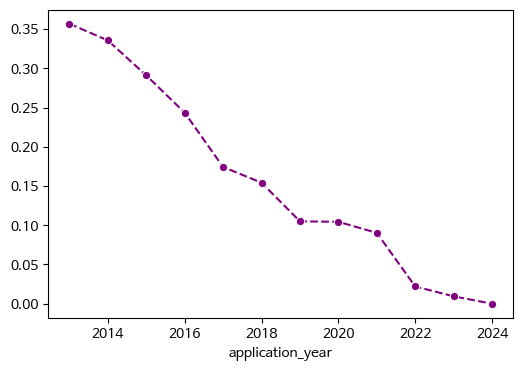

In [55]:
# 출원 건수 계산
counts = data.groupby(['application_year', 'ongoing']).size().unstack(fill_value=0)
rejection_rate = counts[0] / counts.sum(axis=1)

# 시각화
fig, ax1 = plt.subplots(figsize=(6, 4))
sns.lineplot(data=rejection_rate, linestyle='--', marker='o', color='purple', ax=ax1)

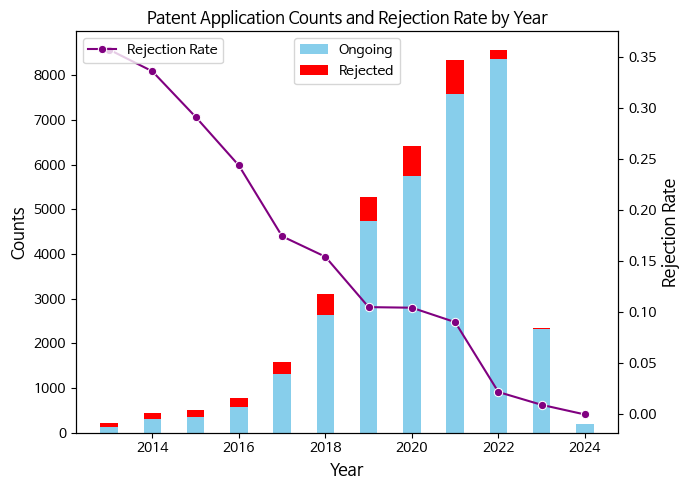

In [62]:
# 시각화
fig, ax1 = plt.subplots(figsize=(7, 5))

# 각각의 막대를 직접 그리기
bar_width = 0.4
years = counts.index
ax1.bar(years, counts[1], width=bar_width, label='Ongoing', color='skyblue')
ax1.bar(years, counts[0], width=bar_width, bottom=counts[1], label='Rejected', color='red')

# 라인 그래프 (거절율)
ax2 = ax1.twinx()
sns.lineplot(data=rejection_rate, marker='o', color='purple', ax=ax2, label='Rejection Rate')

# 그래프 제목과 축 레이블 설정
ax1.set_title('Patent Application Counts and Rejection Rate by Year', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Counts', fontsize=12, fontweight='bold')
ax2.set_ylabel('Rejection Rate', fontsize=12, fontweight='bold')

# 범례 설정
ax1.legend(loc='upper center')
ax2.legend(loc='upper left')

# 오른쪽 Y축 라벨 위치 조정
ax2.yaxis.set_label_position('right')

# 그래프 출력
plt.tight_layout()
plt.show()

In [51]:
counts


ongoing,0,1
application_year,,
2013,76,137
2014,151,299
2015,149,363
2016,187,581
2017,276,1308
2018,480,2632
2019,555,4732
2020,670,5748
2021,753,7587


In [52]:
print(type(rejection_rate))


<class 'pandas.core.series.Series'>
